# **WEEK 1**

In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Indian_Kids_Screen_Time.csv')
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [3]:
#To check Null values
print("Checking Null Values")
print(data.isnull().sum())

Checking Null Values
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [4]:
print("Number of Duplicate Rows")
print(data.duplicated().sum())
#Dropping our duplicates datas in our dataset
data=data.drop_duplicates()

Number of Duplicate Rows
44


In [5]:
print("Statistical Measures")
data.describe()


Statistical Measures


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9668.000000,9668.000000,9668.000000
mean,12.992760,4.367780,0.427028
std,3.158931,1.703002,0.073185
min,8.000000,0.000000,0.300000
25%,10.000000,3.427500,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


Correlation matrix
                                        Age  Avg_Daily_Screen_Time_hr  \
Age                                1.000000                  0.108873   
Avg_Daily_Screen_Time_hr           0.108873                  1.000000   
Exceeded_Recommended_Limit         0.150615                  0.657812   
Educational_to_Recreational_Ratio -0.488017                 -0.081445   

                                   Exceeded_Recommended_Limit  \
Age                                                  0.150615   
Avg_Daily_Screen_Time_hr                             0.657812   
Exceeded_Recommended_Limit                           1.000000   
Educational_to_Recreational_Ratio                   -0.120873   

                                   Educational_to_Recreational_Ratio  
Age                                                        -0.488017  
Avg_Daily_Screen_Time_hr                                   -0.081445  
Exceeded_Recommended_Limit                                 -0.120873  
Educa

Text(0.5, 1.0, 'Correlation of all numerical Columns')

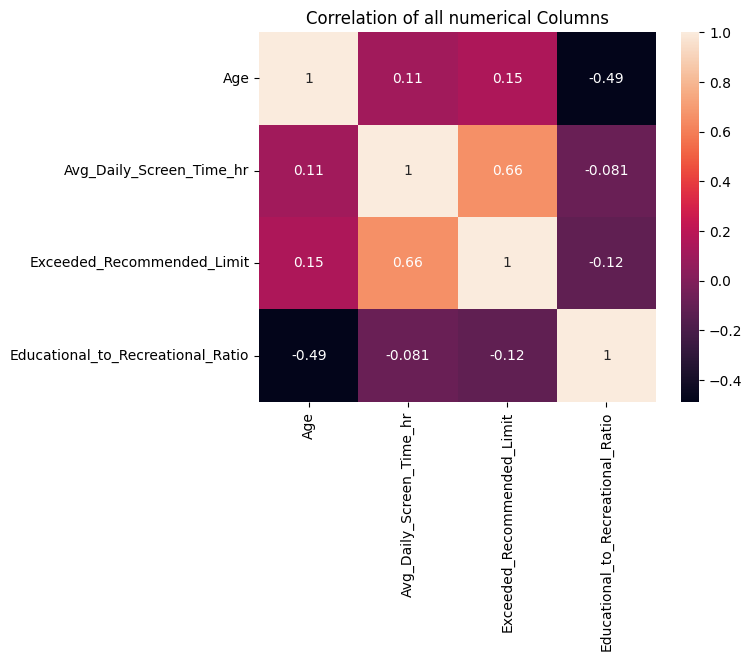

In [6]:
print("Correlation matrix")
correlation=data.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.title("Correlation of all numerical Columns")


In [7]:
# Grouping the  Urban_or_Rural and calculate the average daily screen time
screen_time = data.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().round(2)

print("Average Screen Time by Area:\n", screen_time)


Average Screen Time by Area:
 Urban_or_Rural
Rural    4.38
Urban    4.36
Name: Avg_Daily_Screen_Time_hr, dtype: float64


In [8]:
print("Information of All Columns")
data.info()

Information of All Columns
<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB


In [9]:
print("Data types of Each Columns")
print(data.dtypes)

Data types of Each Columns
Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


In [10]:
# Find the Interquartile Range
#we take only numerical values to find IQR
numerical_col = data.select_dtypes(include = ['int64', 'float64'])
Quan1=numerical_col.quantile(0.25)
Quan3=numerical_col.quantile(0.75)
iqr= Quan3-Quan1
print("IQR")
print(iqr)
#we can also find outliers using IQR
outlier = ((numerical_col>(Quan1 - 1.5 * iqr)) | (numerical_col >(Quan3 + 1.5 * iqr)))
print("Outliers")
print(outlier.sum())


IQR
Age                                  6.0000
Avg_Daily_Screen_Time_hr             1.9525
Educational_to_Recreational_Ratio    0.1100
dtype: float64
Outliers
Age                                  9668
Avg_Daily_Screen_Time_hr             9374
Educational_to_Recreational_Ratio    9668
dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Avg_Daily_Screen_Time_hr'),
  Text(2, 0, 'Exceeded_Recommended_Limit'),
  Text(3, 0, 'Educational_to_Recreational_Ratio')])

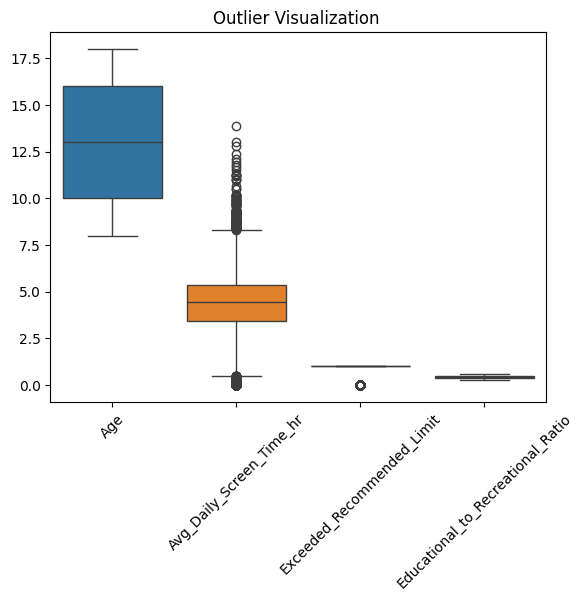

In [11]:
# To visualize the Outliers
sns.boxplot(data)
plt.title("Outlier Visualization ")
plt.xticks(rotation=45)



**Observation:**

**Total Missing Values:** 3,218 rows is missing in Health_Impacts.
Since a large portion of Health_Impacts data is missing,then the  meaningful health-related datas are limited.

**Average_Screen_Time:**
Urban = 4.38 hrs → Kids in urban areas spend more time on screens.

Rural = 4.36 hrs → Kids in rural areas spend comparatively less time.

Most screen time is spent on recreational rather than educational activities.

**Outliers:** It is identified in the Avg_Daily_Screen_Time_hr column using the IQR method and visualization  with a boxplot.It occurs mostly in high screen time values.

# **WEEK 2**

In [12]:
#Create Age Bands

age_bins = [7, 10, 14, 18]
age_labels = ['Child', 'Pre-Teen', 'Teenager']
data['Age_Band'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
print(data['Age_Band'])


0       Pre-Teen
1       Pre-Teen
2       Teenager
3       Teenager
4       Pre-Teen
          ...   
9707    Teenager
9708    Teenager
9709    Teenager
9710    Teenager
9711    Teenager
Name: Age_Band, Length: 9668, dtype: category
Categories (3, object): ['Child' < 'Pre-Teen' < 'Teenager']


In [13]:
# Identifying the columns with missing values
missing_cols = data.columns[data.isnull().any()]
print("Columns with missing values:", list(missing_cols))

Columns with missing values: ['Health_Impacts']


In [14]:
#As the None values are converted null when checking for null values,
#then nan values will become 3180 as there are no real null values
none_count = (data['Health_Impacts'] == 'None').sum()
print("Number of 'None' string values:", none_count)
nan_count = data['Health_Impacts'].isnull().sum()
print("Number of real NaN values:", nan_count)


Number of 'None' string values: 0
Number of real NaN values: 3180


In [15]:
#  Replace 'None' strings with NaN
data['Health_Impacts'] = data['Health_Impacts'].replace('None', pd.NA)

# Fill all NaN values with 'No Impacts'
data['Health_Impacts'] = data['Health_Impacts'].fillna('No Impacts')


In [16]:
# Verifying if the missing values are handled
print("\nMissing values after replacement:\n", data.isnull().sum())


Missing values after replacement:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Band                             0
dtype: int64


In [17]:
import re

# Define keywords for each category
physical_keywords = ['Sleep', 'Eye', 'Posture', 'Obesity', 'Fatigue', 'Vision', 'Weight']
mental_keywords = ['Stress', 'Anxiety', 'Depression', 'Addiction', 'Behavior', 'Emotional']

# Function to extract full phrases around each keyword
def extract_full_phrases(text, keywords):
    text = str(text).lower()

    # Split text into parts using commas, "and", or semicolons
    parts = re.split(r'[;,]| and ', text)

    found = []
    for part in parts:
        for kw in keywords:
            if kw in part:
                # Clean extra spaces and save the phrase
                cleaned = part.strip()
                if cleaned not in found:
                    found.append(cleaned)

    return ', '.join(found) if found else 'No Impact'

# Apply to dataset
data['Physical_Health'] = data['Health_Impacts'].apply(lambda x: extract_full_phrases(x, physical_keywords))
data['Mental_Health'] = data['Health_Impacts'].apply(lambda x: extract_full_phrases(x, mental_keywords))

# Verify the result
print(data[['Health_Impacts', 'Physical_Health', 'Mental_Health']].head(10))


             Health_Impacts           Physical_Health Mental_Health
0    Poor Sleep, Eye Strain    poor sleep, eye strain     No Impact
1                Poor Sleep                poor sleep     No Impact
2                Poor Sleep                poor sleep     No Impact
3                No Impacts                 No Impact     No Impact
4       Poor Sleep, Anxiety                poor sleep       anxiety
5                Poor Sleep                poor sleep     No Impact
6                No Impacts                 No Impact     No Impact
7                No Impacts                 No Impact     No Impact
8       Poor Sleep, Anxiety                poor sleep       anxiety
9  Poor Sleep, Obesity Risk  poor sleep, obesity risk     No Impact


In [18]:
# Saving the updated dataset in a CSV file
data.to_csv("Cleaned_Dataset.csv", index=False)
print("\n The Cleaned Dataset is saved as 'Cleaned_Dataset.csv'")


 The Cleaned Dataset is saved as 'Cleaned_Dataset.csv'


In [19]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Physical_Health,Mental_Health
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen,"poor sleep, eye strain",No Impact
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,poor sleep,No Impact
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager,poor sleep,No Impact
3,15,Female,1.21,Laptop,False,0.39,No Impacts,Urban,Teenager,No Impact,No Impact
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,poor sleep,anxiety


### **Summary**

Created a new Column called Age_band By grouping the Ages in the dataset.

The  missing values in the Health_Impacts column were stored as 'None' (text) instead of actual nulls.

Converted all 'None' values into proper missing (NaN) values for consistency.

Replaced these NaN values with the label **"No Impacts"** to clearly indicate no health effects.

Verified that no missing values remain after cleaning.

Health_Impacts column are splitted into Physical_Health and Mental_Health by extracting relevant phrases for each category. Rows with no matching phrases are labeled "No Impact"

Saved the cleaned dataset for further analysis and modeling.